In [24]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten
import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report

In [25]:
#import our data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,rotation_range=10, fill_mode='nearest',
     featurewise_center=True,
    featurewise_std_normalization=True,
    vertical_flip= True,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range = (0.4,0.6),
    horizontal_flip=True,validation_split=0.3)

In [26]:
train_generator = train_datagen.flow_from_directory(
    'C:/Users/tyagi/OneDrive/Desktop/Capstone Summer/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='training'
  )

Found 3942 images belonging to 4 classes.


In [27]:
test_generator = train_datagen.flow_from_directory(
     'C:/Users/tyagi/OneDrive/Desktop/Capstone Summer/data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',subset='validation'
    
  )

Found 1689 images belonging to 4 classes.


Found 5631 files belonging to 4 classes.


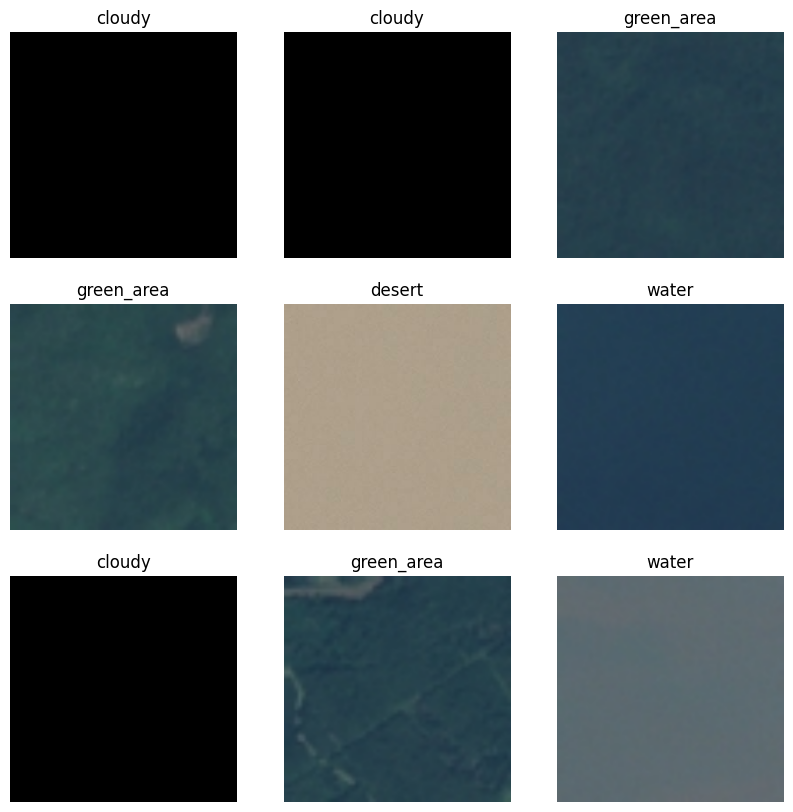

In [28]:
train_dataset = image_dataset_from_directory('C:/Users/tyagi/OneDrive/Desktop/Capstone Summer/data',
                                             shuffle=True,
                                                 batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

In [29]:
#call Restnetmodel model
ResNet_model = ResNet50(include_top=True ,weights='imagenet')
for models in ResNet_model.layers:
  models.trainable= False

In [30]:
ResNet_model = keras.Model(inputs=ResNet_model.input, outputs=ResNet_model.layers[-2].output)
model = keras.Sequential()
model.add(ResNet_model)

model.add(Dense(4, activation='softmax'))

In [31]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [32]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [34]:
FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early],
    epochs = 50)

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.2639 - loss: 1.3944 - val_accuracy: 0.2664 - val_loss: 1.3981
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.2675 - loss: 1.3916 - val_accuracy: 0.2664 - val_loss: 1.3815
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.2678 - loss: 1.3846 - val_accuracy: 0.2664 - val_loss: 1.3837
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.2769 - loss: 1.3804 - val_accuracy: 0.5009 - val_loss: 1.3894
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.2965 - loss: 1.3803 - val_accuracy: 0.2664 - val_loss: 1.3714
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.3001 - loss: 1.3764 - val_accuracy: 0.2664 - val_loss: 1.3768
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - accuracy: 0.2805 - loss: 1.3742 - val_accuracy: 0.2664 - val_loss: 1.3923
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.2812 - loss: 1.3733 - val_accu

In [35]:
model.evaluate(test_generator)

53/53 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.4756 - loss: 1.3255


[1.3224412202835083, 0.4860864281654358]

In [36]:
#classes names 
class_name = {0:"cloud",1:"desert", 2 : 'green_area', 3: 'water'}

In [37]:
#predict test data
y = model.predict(test_generator)
y =  np.argmax(y,axis= 1 )
y 

53/53 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step


array([0, 2, 2, ..., 2, 0, 0], dtype=int64)

In [38]:
#y_true and y_pred
y_true = np.array([])
y_pred = np.array([])

i = 0
for data, labels in test_generator:
  i += 1
  y = np.argmax(model.predict(data), axis=1)
  y_true = np.append(y_true, labels)
  y_pred = np.append(y_pred, y)
  
  if i == test_generator.samples // 32 + 1:
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

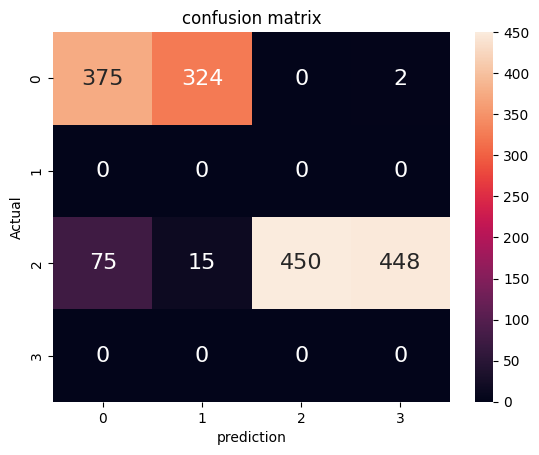

In [39]:
cm  = confusion_matrix(y_pred,y_true)
df_cm = pd.DataFrame(cm, index = [i for i in range(4)],
                  columns = [i for i in range(4)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [40]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

         0.0       0.83      0.53      0.65       701
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.46      0.63       988
         3.0       0.00      0.00      0.00         0

    accuracy                           0.49      1689
   macro avg       0.46      0.25      0.32      1689
weighted avg       0.93      0.49      0.64      1689



c:\Users\tyagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tyagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tyagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

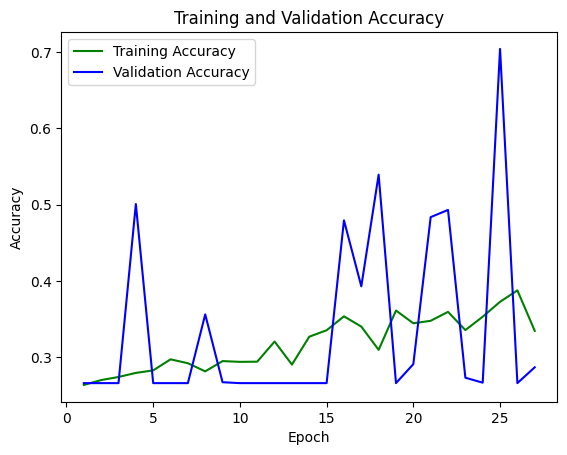

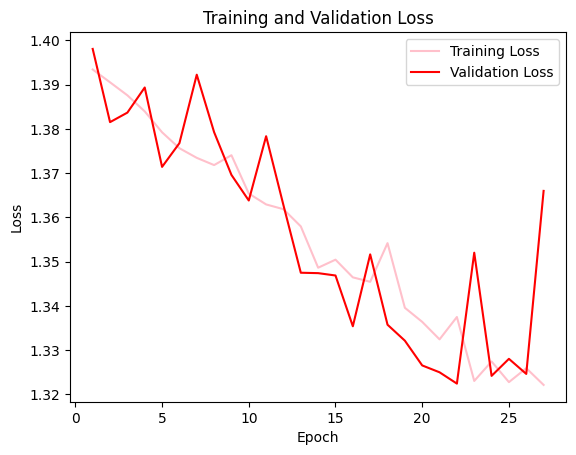

In [41]:
#plot the result
import matplotlib.pyplot as plt
acc = FIT.history['accuracy']
val_acc = FIT.history['val_accuracy']
loss = FIT.history['loss']
val_loss = FIT.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()